# Unsupervised Methods

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
from wordcloud import WordCloud

## 1. Load the data

In [220]:
# load the data
test_df = pd.read_csv('data/data_masked/test_masked_stop_lemma.csv')

In [222]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           7328 non-null   int64 
 1   text            7328 non-null   object
 2   text_length     7328 non-null   int64 
 3   summary         7328 non-null   object
 4   summary_length  7328 non-null   int64 
 5   masked_summary  7328 non-null   object
dtypes: int64(3), object(3)
memory usage: 343.6+ KB


In [223]:
test_df.head()

,label,text,text_length,summary,summary_length,masked_summary
0,1,marc kohle bank teller modesto first federal w...,71,marc kohle bank teller modesto first federal w...,71,person bank teller org weird hair guy work ban...
1,1,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends person say date since purcha...
2,4,46magnitude earthquake jolt central california...,133,46magnitude earthquake jolt central california...,133,cardinalmagnitude earthquake jolt central gpe ...
3,3,urban survival city fall apart strategy keep a...,1485,well many commuter spend large majority time a...,493,well many commuter spend large majority time a...
4,3,27 thing every american know national debtmich...,1751,live way mean long not idea normal actually an...,408,live way mean long not idea normal actually an...


## 2. K-Means Clustering

### 2.1 Text

In [224]:
text = test_df['text']
# lower case
text = text.str.lower()

In [173]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=2000)
tfidf = tfidf_vectorizer.fit_transform(text)

In [16]:
num_clusters_k = 15

In [17]:
sse, silhouette_scores = [], []

for k in tqdm(range(3, num_clusters_k)):
    kmeans = KMeans(n_clusters=k,  verbose=False,random_state=0).fit(tfidf.A)
    cluster_labels = kmeans.fit_predict(tfidf.A)
    # cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(tfidf.A, cluster_labels)

    sse.append((k,kmeans.inertia_))
    silhouette_scores.append((k,silhouette_avg))
    # print("For n_clusters =", k,
    #       "The average silhouette_score is :", silhouette_avg)

  0%|          | 0/12 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'split'

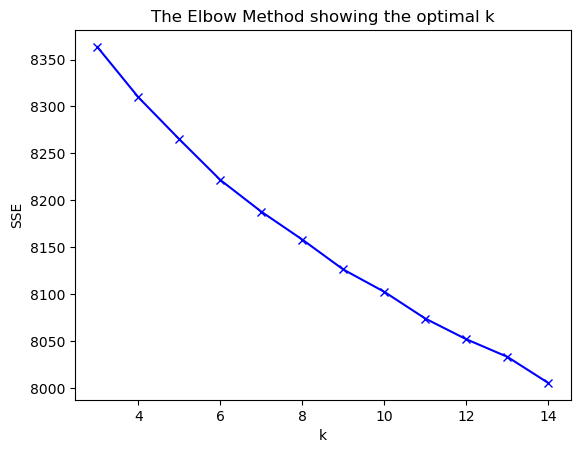

In [90]:
# plot the elbow curve
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

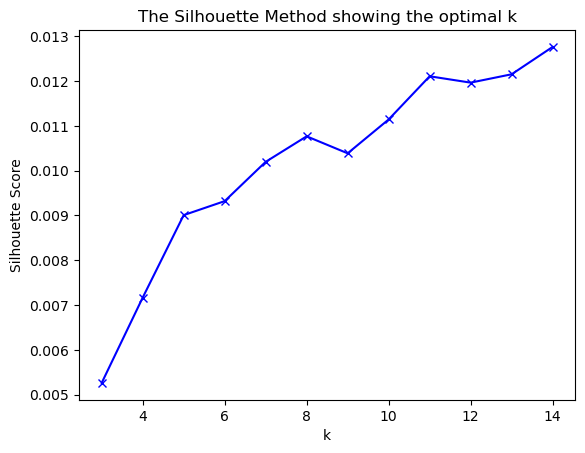

In [91]:
# plot the silhouette curve
plt.plot(pd.DataFrame(silhouette_scores)[0], pd.DataFrame(silhouette_scores)[1], 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()

In [48]:
# def plot_kmeans(tfidf):
#     tfidf_array = tfidf.A

#     # standardize the data
#     scaler = StandardScaler()
#     tfidf_array = scaler.fit_transform(tfidf_array)

#     # reduce the dimensionality
#     pca = PCA(n_components=2)
#     tfidf_array = pca.fit_transform(tfidf_array)

#     # kmeans
#     kmeans = KMeans(n_clusters=4,  verbose=False,random_state=0).fit(tfidf_array)
#     cluster_labels = kmeans.fit_predict(tfidf_array)

#     # plot the clusters
#     plt.scatter(tfidf_array[:, 0], tfidf_array[:, 1], c=cluster_labels, s=50, cmap='rainbow', alpha=0.8)
#     # show center labels on the plot
#     plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
#     plt.show()

#     return kmeans,cluster_labels

### 2.2 Try PCA --> K-Means

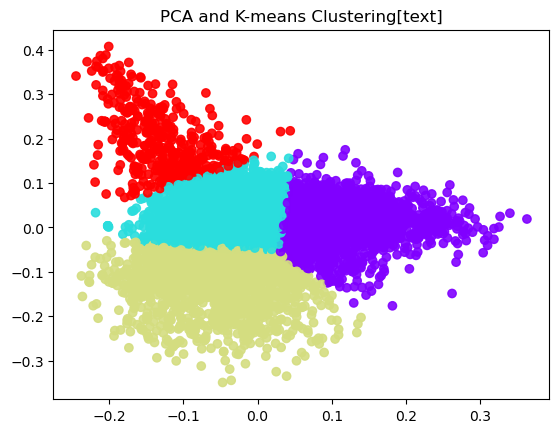

In [152]:
# tfidf_array = 

# standardize the data
# scaler = StandardScaler()
# tfidf_array = scaler.fit_transform(tfidf.A)

# reduce the dimensionality
pca = PCA(n_components=2)
tfidf.A = pca.fit_transform(tfidf.A)

# kmeans
kmeans = KMeans(n_clusters=4,  verbose=False,random_state=0).fit(tfidf.A)
cluster_labels = kmeans.fit_predict(tfidf.A)

# plot the clusters
plt.scatter(tfidf.A[:, 0], tfidf.A[:, 1], c=cluster_labels, cmap='rainbow', alpha=0.9)
plt.title('PCA and K-means Clustering[text]')
# show center labels on the plot
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [154]:
test_df['cluster_label'] = cluster_labels
test_df['cluster_label'].value_counts()

1    2950
0    2331
2    1631
3     416
Name: cluster_label, dtype: int64

In [155]:
test_df['label'].value_counts()

3    2659
1    2134
4    1449
2    1086
Name: label, dtype: int64

In [32]:
# check accuracy
# true_label = test_df['label']
# pred_label = test_df['cluster_label']

# # calculate the accuracy
# accuracy = (true_label == pred_label).sum()/len(true_label)
# print('Accuracy: ', accuracy)

Accuracy:  0.2908024017467249


### 2.3 Try K-Means --> PCA

In [225]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=2000)
tfidf = tfidf_vectorizer.fit_transform(text)

In [226]:
kmeans = KMeans(n_clusters=4,  verbose=False,random_state=0).fit(tfidf.A)
cluster_labels = kmeans.fit_predict(tfidf.A)

In [227]:
test_df['cluster_label'] = cluster_labels
true_label = test_df['label']

In [228]:
# visualize the clusters
# reduce the dimensionality of the data
pca = PCA(n_components=2, random_state=0)
pca.fit(tfidf.A)
pca_data = pca.transform(tfidf.A)

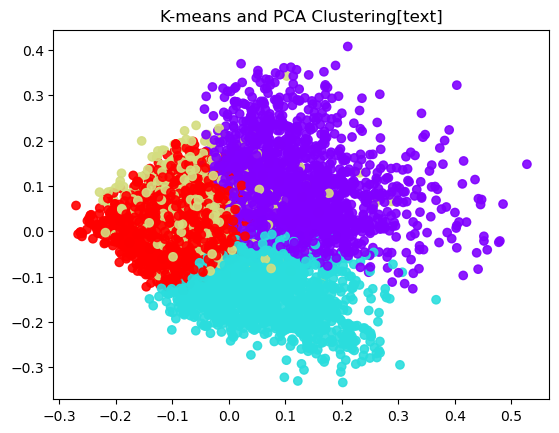

In [229]:
# plot the clusters, and show the overlap regions
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_labels, cmap='rainbow', alpha=0.9)
plt.title('K-means and PCA Clustering[text]')
plt.show()

## Check F1 score

In [230]:
test_df.head()

,label,text,text_length,summary,summary_length,masked_summary,cluster_label
0,1,marc kohle bank teller modesto first federal w...,71,marc kohle bank teller modesto first federal w...,71,person bank teller org weird hair guy work ban...,3
1,1,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends person say date since purcha...,1
2,4,46magnitude earthquake jolt central california...,133,46magnitude earthquake jolt central california...,133,cardinalmagnitude earthquake jolt central gpe ...,3
3,3,urban survival city fall apart strategy keep a...,1485,well many commuter spend large majority time a...,493,well many commuter spend large majority time a...,0
4,3,27 thing every american know national debtmich...,1751,live way mean long not idea normal actually an...,408,live way mean long not idea normal actually an...,0


In [231]:
# assign labels to the most common labels in each cluster
cluster_label_dict = {}
for i in range(4):
    cluster_label_dict[i] = test_df[test_df['cluster_label'] == i]['label'].value_counts().index[0]

# assign the most common label to each cluster
test_df['cluster_label'] = test_df['cluster_label'].map(cluster_label_dict)

In [232]:
test_df.head()

,label,text,text_length,summary,summary_length,masked_summary,cluster_label
0,1,marc kohle bank teller modesto first federal w...,71,marc kohle bank teller modesto first federal w...,71,person bank teller org weird hair guy work ban...,4
1,1,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends person say date since purcha...,1
2,4,46magnitude earthquake jolt central california...,133,46magnitude earthquake jolt central california...,133,cardinalmagnitude earthquake jolt central gpe ...,4
3,3,urban survival city fall apart strategy keep a...,1485,well many commuter spend large majority time a...,493,well many commuter spend large majority time a...,3
4,3,27 thing every american know national debtmich...,1751,live way mean long not idea normal actually an...,408,live way mean long not idea normal actually an...,3


In [233]:
# calculate F1 score
from sklearn.metrics import f1_score
f1_score_kmeans = f1_score(true_label, test_df['cluster_label'], average='weighted')
print('F1 score: ', f1_score_kmeans)

from sklearn.metrics import classification_report
class_report = classification_report(true_label, test_df['cluster_label'])

print(class_report)

F1 score:  0.6427488728908687
              precision    recall  f1-score   support

           1       0.73      0.62      0.67      2134
           2       0.74      0.47      0.57      1086
           3       0.88      0.66      0.76      2659
           4       0.33      0.65      0.44      1449

    accuracy                           0.62      7328
   macro avg       0.67      0.60      0.61      7328
weighted avg       0.71      0.62      0.64      7328



## Pretrained Word2Vec

In [236]:
# add pretrained glove embeddings
from gensim.models import KeyedVectors
from sklearn.preprocessing import MinMaxScaler
word2vec = KeyedVectors.load_word2vec_format('/Users/zhaoxu/NUS_AI_Courses/CS5246_Text_Mining/cs5246-assignment-4/word2vec/model.bin', binary=True)

In [235]:
# get the vector of a sentence
def get_sentence_vector(sentence):
    words = sentence.split()
    vector = np.zeros(300)
    for word in words:
        if word in word2vec:
            vector += word2vec[word]
    return vector / len(words)

In [237]:
text = test_df['text']
text = [get_sentence_vector(sentence) for sentence in text]
scaler = MinMaxScaler()
text = scaler.fit_transform(text)

In [238]:
kmeans = KMeans(n_clusters=4,  verbose=False,random_state=0).fit(text)
cluster_labels = kmeans.fit_predict(text)

In [239]:
test_df['cluster_label'] = cluster_labels
true_label = test_df['label']

In [241]:
# visualize the clusters
# reduce the dimensionality of the data
pca = PCA(n_components=2, random_state=0)
pca.fit(text)
pca_data = pca.transform(text)

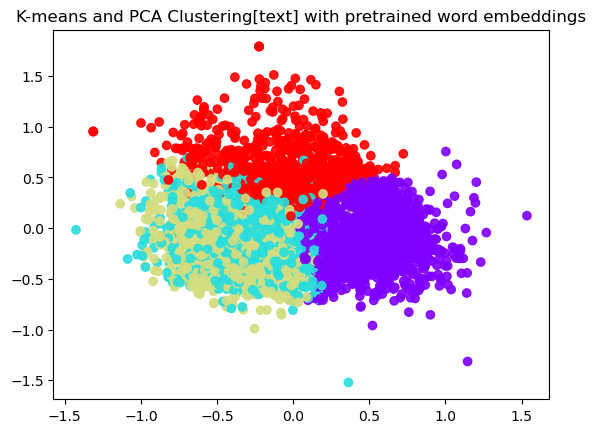

In [242]:
# plot the clusters, and show the overlap regions
plt.scatter(pca_data[:,0], pca_data[:,1], c=cluster_labels, cmap='rainbow', alpha=0.9)
plt.title('K-means and PCA Clustering[text] with pretrained word embeddings')
plt.show()

In [243]:
test_df.head()

,label,text,text_length,summary,summary_length,masked_summary,cluster_label
0,1,marc kohle bank teller modesto first federal w...,71,marc kohle bank teller modesto first federal w...,71,person bank teller org weird hair guy work ban...,0
1,1,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends person say date since purcha...,3
2,4,46magnitude earthquake jolt central california...,133,46magnitude earthquake jolt central california...,133,cardinalmagnitude earthquake jolt central gpe ...,3
3,3,urban survival city fall apart strategy keep a...,1485,well many commuter spend large majority time a...,493,well many commuter spend large majority time a...,2
4,3,27 thing every american know national debtmich...,1751,live way mean long not idea normal actually an...,408,live way mean long not idea normal actually an...,2


In [244]:
# assign labels to the most common labels in each cluster
cluster_label_dict = {}
for i in range(4):
    cluster_label_dict[i] = test_df[test_df['cluster_label'] == i]['label'].value_counts().index[0]

# assign the most common label to each cluster
test_df['cluster_label'] = test_df['cluster_label'].map(cluster_label_dict)

In [245]:
test_df.head()

,label,text,text_length,summary,summary_length,masked_summary,cluster_label
0,1,marc kohle bank teller modesto first federal w...,71,marc kohle bank teller modesto first federal w...,71,person bank teller org weird hair guy work ban...,1
1,1,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends michael ziglar say monday si...,88,buckeye azfriends person say date since purcha...,4
2,4,46magnitude earthquake jolt central california...,133,46magnitude earthquake jolt central california...,133,cardinalmagnitude earthquake jolt central gpe ...,4
3,3,urban survival city fall apart strategy keep a...,1485,well many commuter spend large majority time a...,493,well many commuter spend large majority time a...,3
4,3,27 thing every american know national debtmich...,1751,live way mean long not idea normal actually an...,408,live way mean long not idea normal actually an...,3


In [246]:
# calculate F1 score
from sklearn.metrics import f1_score
f1_score_kmeans = f1_score(true_label, test_df['cluster_label'], average='weighted')
print('F1 score: ', f1_score_kmeans)

from sklearn.metrics import classification_report
class_report = classification_report(true_label, test_df['cluster_label'])

print(class_report)

F1 score:  0.467498015218337
              precision    recall  f1-score   support

           1       0.58      0.68      0.62      2134
           2       0.00      0.00      0.00      1086
           3       0.53      0.76      0.62      2659
           4       0.37      0.25      0.30      1449

    accuracy                           0.52      7328
   macro avg       0.37      0.42      0.39      7328
weighted avg       0.43      0.52      0.47      7328



/Users/zhaoxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaoxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaoxu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Wordcloud of the clusters

In [132]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(210, 100%, 24%)"

In [ ]:
# def get_mask():
#     return np.array(Image.open("data/oval-mask.png"))

In [133]:
def plot_cluster_wordcloud(vectorizer, kmeans, label):
    # Get indices of all articles in the same cluster
    #article_indices = np.argwhere(clustering==label)
    # Extract the respective articles    
    #cluster_articles = [ article for idx, article in enumerate(articles) if idx in article_indices ]
    
    centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    
    term_frequencies = kmeans.cluster_centers_[label]
    sorted_terms = centroids[label]
    frequencies = {terms[i]: term_frequencies[i] for i in sorted_terms}
    
    # wc = WordCloud(color_func=color_func, background_color="white", max_words=500, mask=get_mask(), contour_width=0)
    wc = WordCloud(color_func=color_func, background_color="white", max_words=500, contour_width=0)
    #wc = WordCloud(background_color="white", max_words=50)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # show
    plt.figure()
    # use label as title
    plt.title("Cluster " + str(label))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout()
    plt.show()    
    

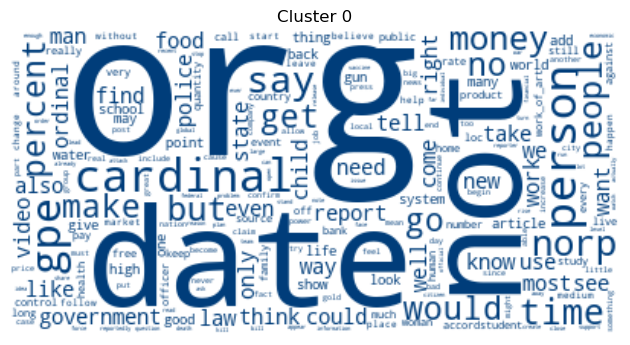

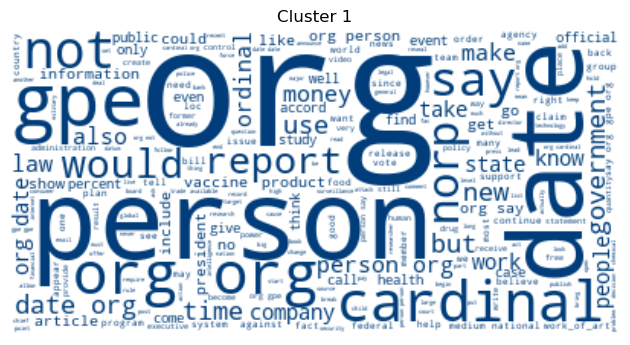

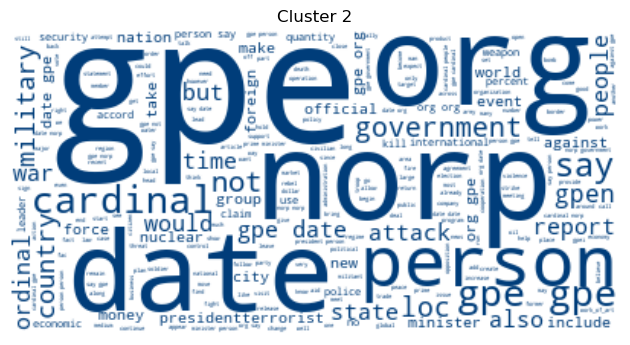

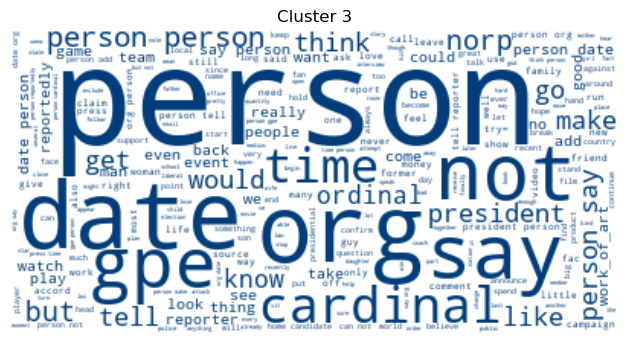

In [134]:
for cid in range(4):
    plot_cluster_wordcloud(tfidf_vectorizer, kmeans, cid)

In [ ]:
# def plot_original_data_wordcloud():
    